In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_datareader import data as web

In [81]:
tickers = ["^VIX","VXX","VIXY","VIIX","VIXM","VXZ","UVXY", "^GSPC"]

### Volatility Analysis of the top 6 volatility ETFs

In [122]:
df = pd.DataFrame()
for t in tickers:
    df[t] = web.DataReader(t, data_source="yahoo", start="2019-1-1")["Adj Close"]

### We can see the volatility of the volatility below. Looks like VIXY, VIIX,VXX, movement are closer to one other than they are with the index, where as VXIM and VXZ  moves closer to the ^VIX index itself. Below we will take a look at the correlation between the "Top performers"

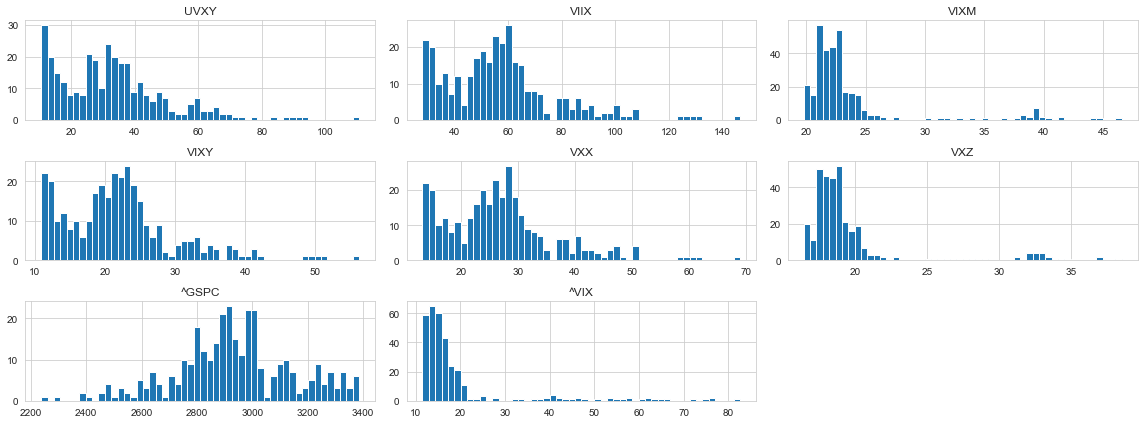

In [123]:
sns.set_style("whitegrid")
df.hist(figsize = (16,6), bins = 50);
plt.tight_layout()

In [124]:
df.corr()

,^VIX,VXX,VIXY,VIIX,VIXM,VXZ,UVXY,^GSPC
^VIX,1.000000,0.723461,0.723842,0.726434,0.909544,0.910752,0.618956,-0.550421
VXX,0.723461,1.000000,0.999948,0.999951,0.771681,0.770889,0.981519,-0.950489
VIXY,0.723842,0.999948,1.000000,0.999950,0.771288,0.770529,0.981674,-0.950634
VIIX,0.726434,0.999951,0.999950,1.000000,0.774050,0.773292,0.980958,-0.949577
VIXM,0.909544,0.771681,0.771288,0.774050,1.000000,0.999882,0.661107,-0.617296
VXZ,0.910752,0.770889,0.770529,0.773292,0.999882,1.000000,0.659902,-0.617130
UVXY,0.618956,0.981519,0.981674,0.980958,0.661107,0.659902,1.000000,-0.951849
^GSPC,-0.550421,-0.950489,-0.950634,-0.949577,-0.617296,-0.617130,-0.951849,1.000000


### Correlation to VIX

In [125]:
df.corr()["^VIX"].sort_values(ascending = False)

^VIX     1.000000
VXZ      0.910752
VIXM     0.909544
VIIX     0.726434
VIXY     0.723842
VXX      0.723461
UVXY     0.618956
^GSPC   -0.550421
Name: ^VIX, dtype: float64

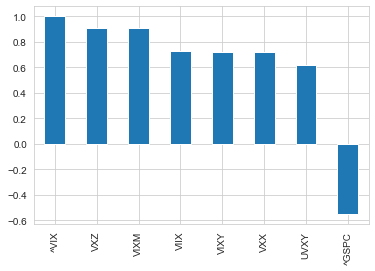

In [126]:
df.corr()["^VIX"].sort_values(ascending = False).plot(kind = "bar")

### VXZ and VIX

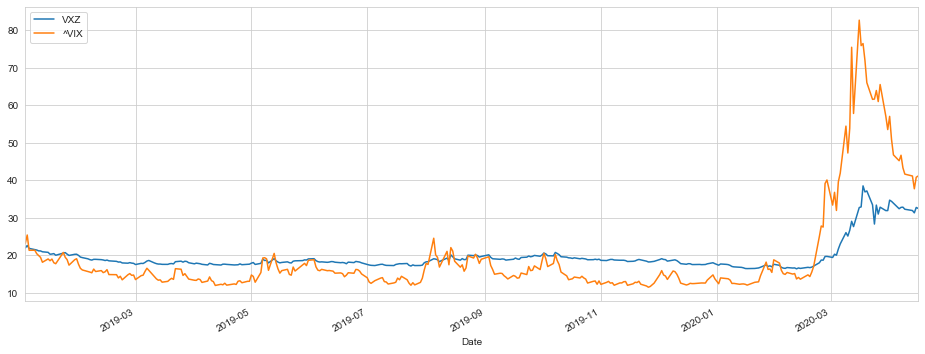

In [127]:
df[["VXZ","^VIX"]].plot(figsize = (16,6));

### VIXM and VIX

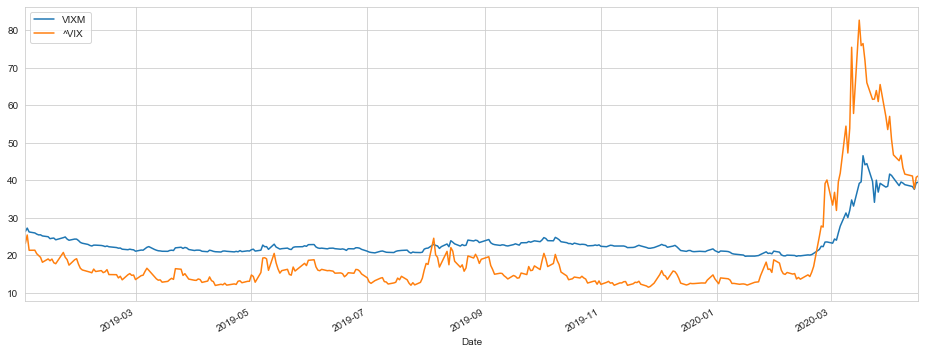

In [128]:
df[["VIXM","^VIX"]].plot(figsize = (16,6));

### VIIX and VIX

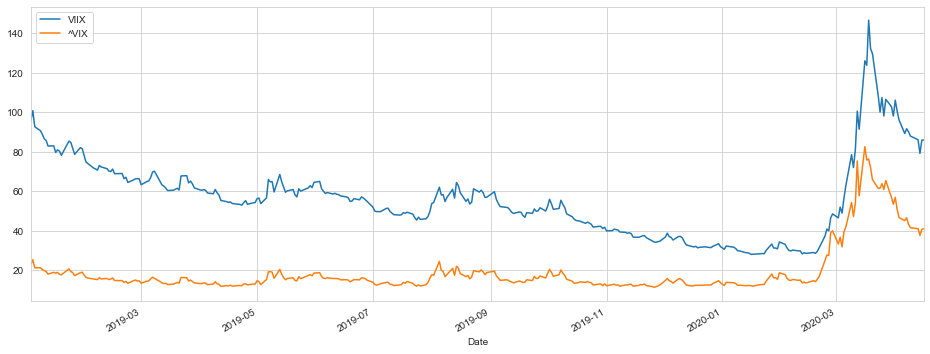

In [129]:
df[["VIIX","^VIX"]].plot(figsize = (16,6));

### VIXY and ^VIX

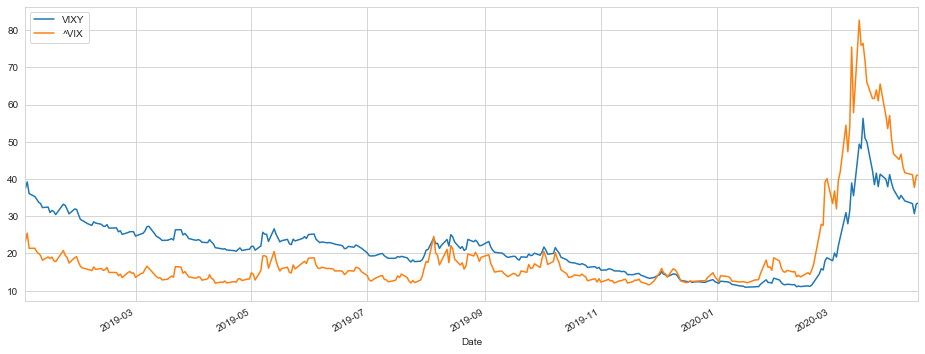

In [130]:
df[["VIXY","^VIX"]].plot(figsize = (16,6));

## VXX And ^VIX

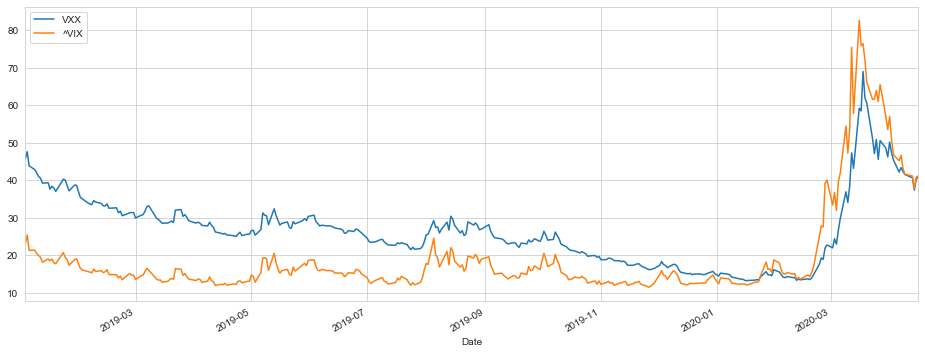

In [131]:
df[["VXX","^VIX"]].plot(figsize = (16,6));

#### Lets take the daily returns for each Symbol

In [132]:
for t in tickers:
    df[f"{t} daily returns"] = df[f"{t}"].pct_change()

In [133]:
df.columns

Index(['^VIX', 'VXX', 'VIXY', 'VIIX', 'VIXM', 'VXZ', 'UVXY', '^GSPC',
       '^VIX daily returns', 'VXX daily returns', 'VIXY daily returns',
       'VIIX daily returns', 'VIXM daily returns', 'VXZ daily returns',
       'UVXY daily returns', '^GSPC daily returns'],
      dtype='object')

In [134]:
daily_returns = df[['^VIX daily returns', 'VXX daily returns', 'VIXY daily returns',
       'VIIX daily returns', 'VIXM daily returns', 'VXZ daily returns',
       'UVXY daily returns', '^GSPC daily returns']]

#### Correlation of Daily Returns

In [135]:
daily_returns.corr()

,^VIX daily returns,VXX daily returns,VIXY daily returns,VIIX daily returns,VIXM daily returns,VXZ daily returns,UVXY daily returns,^GSPC daily returns
^VIX daily returns,1.000000,0.892613,0.893625,0.893721,0.677103,0.680295,0.890841,-0.689767
VXX daily returns,0.892613,1.000000,0.997518,0.998061,0.883723,0.879647,0.998459,-0.772308
VIXY daily returns,0.893625,0.997518,1.000000,0.998511,0.881058,0.878124,0.998811,-0.780250
VIIX daily returns,0.893721,0.998061,0.998511,1.000000,0.880831,0.877404,0.998715,-0.774124
VIXM daily returns,0.677103,0.883723,0.881058,0.880831,1.000000,0.993125,0.884715,-0.737566
VXZ daily returns,0.680295,0.879647,0.878124,0.877404,0.993125,1.000000,0.881567,-0.739751
UVXY daily returns,0.890841,0.998459,0.998811,0.998715,0.884715,0.881567,1.000000,-0.774825
^GSPC daily returns,-0.689767,-0.772308,-0.780250,-0.774124,-0.737566,-0.739751,-0.774825,1.000000


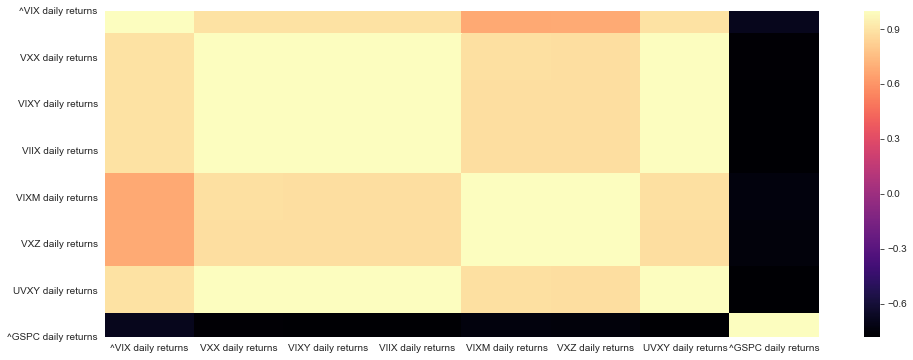

In [136]:
plt.figure(figsize=(16,6))
sns.heatmap(daily_returns.corr(), cmap="magma")

## luck Number 7

In [137]:
df.columns

Index(['^VIX', 'VXX', 'VIXY', 'VIIX', 'VIXM', 'VXZ', 'UVXY', '^GSPC',
       '^VIX daily returns', 'VXX daily returns', 'VIXY daily returns',
       'VIIX daily returns', 'VIXM daily returns', 'VXZ daily returns',
       'UVXY daily returns', '^GSPC daily returns'],
      dtype='object')

In [140]:
df[df["^GSPC daily returns"] * 100 > 7]

,^VIX,VXX,VIXY,VIIX,VIXM,VXZ,UVXY,^GSPC,^VIX daily returns,VXX daily returns,VIXY daily returns,VIIX daily returns,VIXM daily returns,VXZ daily returns,UVXY daily returns,^GSPC daily returns
Date,,,,,,,,,,,,,,,,
2020-03-13,57.830002,43.200001,35.500000,91.470001,33.160000,27.690001,57.240002,2711.020020,-0.233735,-0.087838,-0.088809,-0.091478,-0.046853,-0.048454,-0.119655,0.092871
2020-03-24,61.669998,47.150002,38.480000,100.220001,34.160000,28.370001,60.400002,2447.330078,0.001299,-0.077841,-0.087719,-0.077589,-0.140413,-0.152881,-0.136279,0.093828
2020-04-06,45.240002,42.209999,34.599998,89.309998,38.599998,32.450001,50.599998,2663.679932,-0.033333,-0.071287,-0.071141,-0.071139,-0.049729,-0.043619,-0.105849,0.070331


### 2020-13-20

#### 2020-13-20 there was a spike in the S&P over 7% with our model predicitons there should be an increase in the Volatility market the next trading day after this occurs.

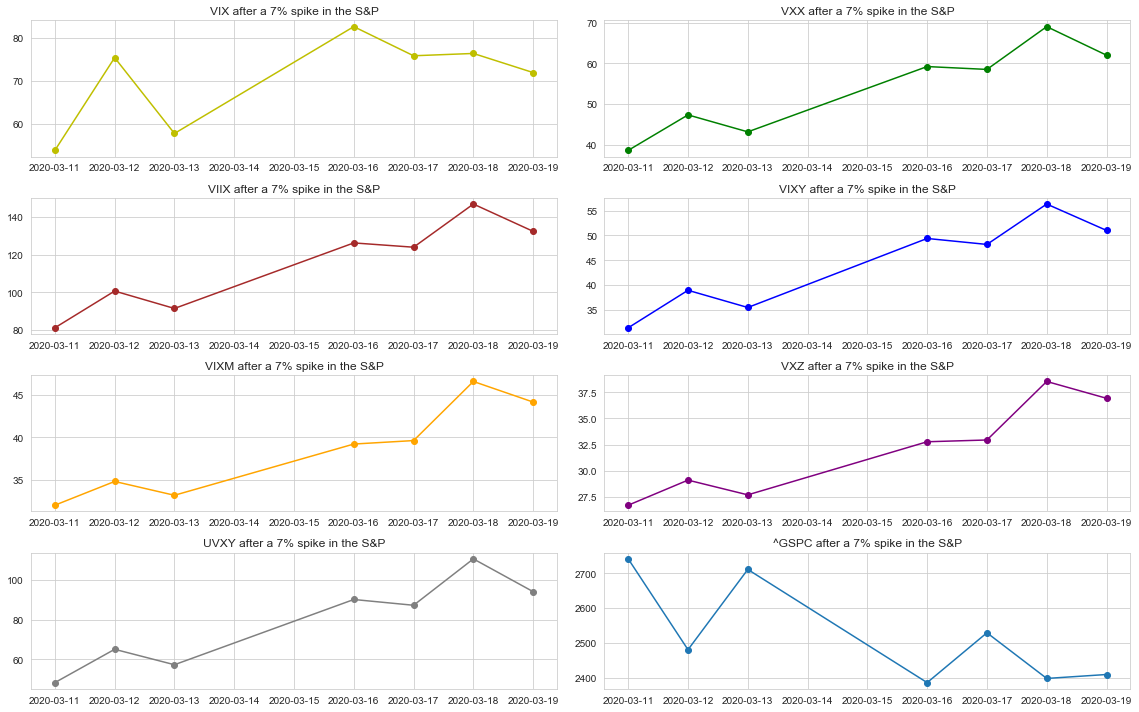

In [181]:
fig, axes = plt.subplots(4,2, figsize = (16,10))
axes[0,0].plot(df.loc["2020-03-11":"2020-03-19"]["^VIX"], marker = "o", c = "y")
axes[0,0].set_title("VIX after a 7% spike in the S&P")
axes[0,1].plot(df.loc["2020-03-11":"2020-03-19"]["VXX"], marker = "o", c = "g")
axes[0,1].set_title("VXX after a 7% spike in the S&P")
axes[1,1].plot(df.loc["2020-03-11":"2020-03-19"]["VIXY"], marker = "o", c = "b")
axes[1,1].set_title("VIXY after a 7% spike in the S&P")
axes[1,0].plot(df.loc["2020-03-11":"2020-03-19"]["VIIX"], marker = "o", c = "brown")
axes[1,0].set_title("VIIX after a 7% spike in the S&P")
axes[2,0].plot(df.loc["2020-03-11":"2020-03-19"]["VIXM"], marker = "o", c = "orange")
axes[2,0].set_title("VIXM after a 7% spike in the S&P")
axes[2,1].plot(df.loc["2020-03-11":"2020-03-19"]["VXZ"], marker = "o", c = "purple")
axes[2,1].set_title("VXZ after a 7% spike in the S&P")
axes[3,0].plot(df.loc["2020-03-11":"2020-03-19"]["UVXY"], marker = "o", c = "grey")
axes[3,0].set_title("UVXY after a 7% spike in the S&P")
axes[3,1].plot(df.loc["2020-03-11":"2020-03-19"]["^GSPC"], marker = "o")
axes[3,1].set_title("^GSPC after a 7% spike in the S&P")
plt.tight_layout()

# 2020-03-24

## 2020-13-24 there was a spike in the S&P over 7% with our model predicitons there should be an increase in the Volatility market the next trading day after this occurs.

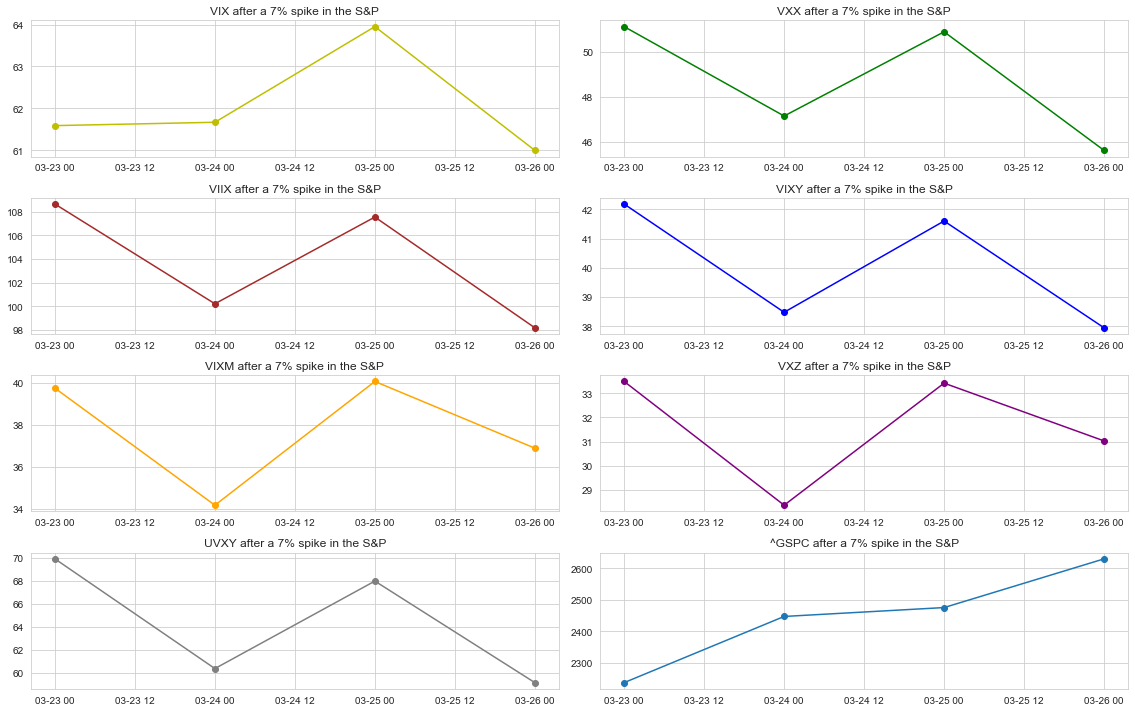

In [182]:
fig, axes = plt.subplots(4,2, figsize = (16,10))
axes[0,0].plot(df.loc["2020-03-21":"2020-03-26"]["^VIX"], marker = "o", c = "y")
axes[0,0].set_title("VIX after a 7% spike in the S&P")
axes[0,1].plot(df.loc["2020-03-21":"2020-03-26"]["VXX"], marker = "o", c = "g")
axes[0,1].set_title("VXX after a 7% spike in the S&P")
axes[1,1].plot(df.loc["2020-03-21":"2020-03-26"]["VIXY"], marker = "o", c = "b")
axes[1,1].set_title("VIXY after a 7% spike in the S&P")
axes[1,0].plot(df.loc["2020-03-21":"2020-03-26"]["VIIX"], marker = "o", c = "brown")
axes[1,0].set_title("VIIX after a 7% spike in the S&P")
axes[2,0].plot(df.loc["2020-03-21":"2020-03-26"]["VIXM"], marker = "o", c = "orange")
axes[2,0].set_title("VIXM after a 7% spike in the S&P")
axes[2,1].plot(df.loc["2020-03-21":"2020-03-26"]["VXZ"], marker = "o", c = "purple")
axes[2,1].set_title("VXZ after a 7% spike in the S&P")
axes[3,0].plot(df.loc["2020-03-21":"2020-03-26"]["UVXY"], marker = "o", c = "grey")
axes[3,0].set_title("UVXY after a 7% spike in the S&P")
axes[3,1].plot(df.loc["2020-03-21":"2020-03-26"]["^GSPC"], marker = "o")
axes[3,1].set_title("^GSPC after a 7% spike in the S&P")
plt.tight_layout()

### 2020-04-06

## 2020-04-06 there was a spike in the S&P over 7% with our model predicitons there should be an increase in the Volatility market the next trading day after this occurs.

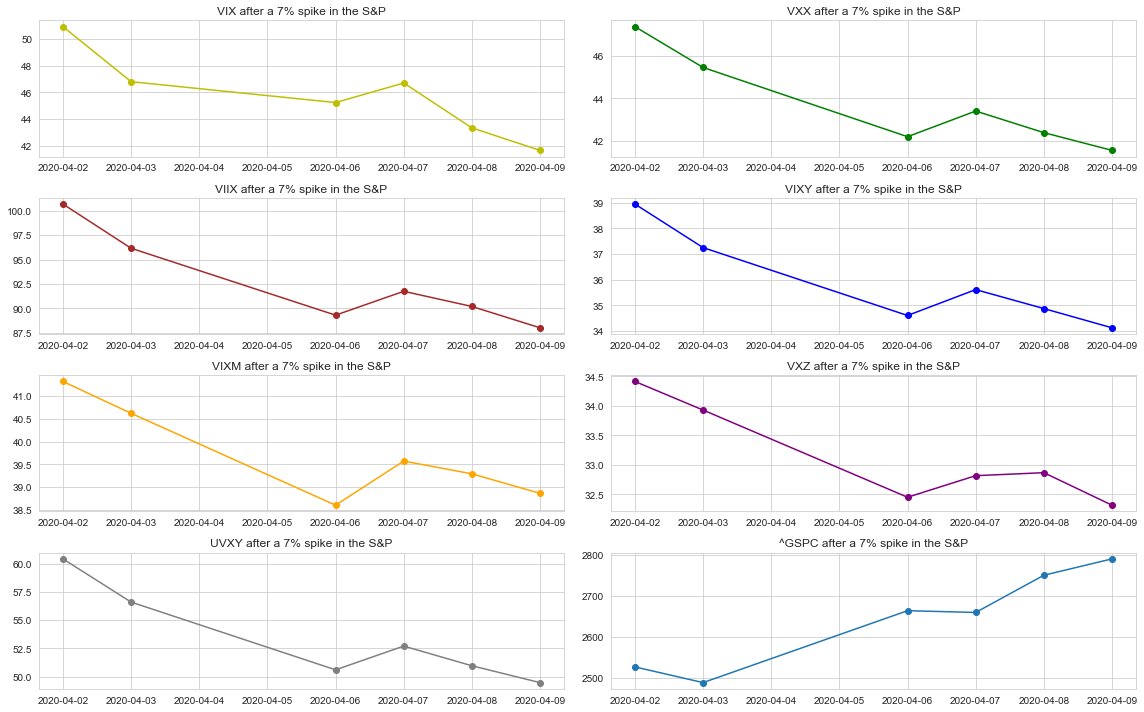

In [184]:
fig, axes = plt.subplots(4,2, figsize = (16,10))
axes[0,0].plot(df.loc["2020-04-02":"2020-04-09"]["^VIX"], marker = "o", c = "y")
axes[0,0].set_title("VIX after a 7% spike in the S&P")
axes[0,1].plot(df.loc["2020-04-02":"2020-04-09"]["VXX"], marker = "o", c = "g")
axes[0,1].set_title("VXX after a 7% spike in the S&P")
axes[1,1].plot(df.loc["2020-04-02":"2020-04-09"]["VIXY"], marker = "o", c = "b")
axes[1,1].set_title("VIXY after a 7% spike in the S&P")
axes[1,0].plot(df.loc["2020-04-02":"2020-04-09"]["VIIX"], marker = "o", c = "brown")
axes[1,0].set_title("VIIX after a 7% spike in the S&P")
axes[2,0].plot(df.loc["2020-04-02":"2020-04-09"]["VIXM"], marker = "o", c = "orange")
axes[2,0].set_title("VIXM after a 7% spike in the S&P")
axes[2,1].plot(df.loc["2020-04-02":"2020-04-09"]["VXZ"], marker = "o", c = "purple")
axes[2,1].set_title("VXZ after a 7% spike in the S&P")
axes[3,0].plot(df.loc["2020-04-02":"2020-04-09"]["UVXY"], marker = "o", c = "grey")
axes[3,0].set_title("UVXY after a 7% spike in the S&P")
axes[3,1].plot(df.loc["2020-04-02":"2020-04-09"]["^GSPC"], marker = "o")
axes[3,1].set_title("^GSPC after a 7% spike in the S&P")
plt.tight_layout()